In [57]:
%matplotlib notebook
import rospy
import cPickle as pickle
import matplotlib.pyplot as plt
import numpy as np

In [112]:
# Read the log buffer.
with open('../nodes/tracker_debug.dat', 'rb') as F:
    # Read the contact objects
    # This is a dictionary keyed by contact number with a list of sequential contacts in each.
    contacts = pickle.load(F)
    # Read the detect objects.
    # This is a list of detect objects. 
    detects = pickle.load(F)
    


In [113]:
# Extract fields of interest.

# Initalize contact dictionaries by field.
tc = {}
xc = {}
yc = {}
vxc = {}
vyc = {}
Pxc = {}
Pyc = {}
mu1c = {}
mu2c = {}
BF = {}
xf1c = {}
yf1c = {}
vxf1c = {}
vyf1c = {}
Pxf1c = {}
Pyf1c = {}
Lf1c = {}
LLf1c = {}
xf2c = {}
yf2c = {}
vxf2c = {}
vyf2c = {}
Pxf2c = {}
Pyf2c = {}
Lf2c = {}
LLf2c = {}
# From Contacts:
for contactid in contacts:
    # Time
    tc[contactid]= [x.evalTime for x in contacts[contactid]]
    # IMM solution.
    xc[contactid] = [x.filter_bank.x[0] for x in contacts[contactid]]
    yc[contactid] = [x.filter_bank.x[1] for x in contacts[contactid]]
    vxc[contactid] = [x.filter_bank.x[2] for x in contacts[contactid]]
    vyc[contactid] = [x.filter_bank.x[3] for x in contacts[contactid]]
    Pxc[contactid] = [x.filter_bank.P[0][0] for x in contacts[contactid]]
    Pyc[contactid] = [x.filter_bank.P[1][1] for x in contacts[contactid]]
    BF[contactid] = [x.bayes_factor for x in contacts[contactid]]
    # IMM Mode and Mixing Probabilities
    mu1c[contactid] = [x.filter_bank.mu[0] for x in contacts[contactid]]
    mu2c[contactid] = [x.filter_bank.mu[1] for x in contacts[contactid]]
    # First order filter solutions
    fIndex = 0
    xf1c[contactid] = [x.filter_bank.filters[fIndex].x[0] for x in contacts[contactid]]
    yf1c[contactid] = [x.filter_bank.filters[fIndex].x[1] for x in contacts[contactid]]
    vxf1c[contactid] = [x.filter_bank.filters[fIndex].x[2] for x in contacts[contactid]]
    vyf1c[contactid] = [x.filter_bank.filters[fIndex].x[3] for x in contacts[contactid]]
    Pxf1c[contactid] = [x.filter_bank.filters[fIndex].P[0][0] for x in contacts[contactid]]
    Pyf1c[contactid] = [x.filter_bank.filters[fIndex].P[1][1] for x in contacts[contactid]]
    Lf1c[contactid] = [x.filter_bank.likelihood[0] for x in contacts[contactid]]
    LLf1c[contactid] = np.log(Lf1c[contactid])
    fIndex = 1
    xf2c[contactid] = [x.filter_bank.filters[fIndex].x[0] for x in contacts[contactid]]
    yf2c[contactid] = [x.filter_bank.filters[fIndex].x[1] for x in contacts[contactid]]
    vxf2c[contactid] = [x.filter_bank.filters[fIndex].x[2] for x in contacts[contactid]]
    vyf2c[contactid] = [x.filter_bank.filters[fIndex].x[3] for x in contacts[contactid]]
    Pxf2c[contactid] = [x.filter_bank.filters[fIndex].P[0][0] for x in contacts[contactid]]
    Pyf2c[contactid] = [x.filter_bank.filters[fIndex].P[1][1] for x in contacts[contactid]]
    Lf2c[contactid] = [x.filter_bank.likelihood[1] for x in contacts[contactid]]
    LLf2c[contactid] = np.log(Lf2c[contactid])

# From Detects:
td = [x['header'].stamp.to_sec() for x in detects]
xd = [x['x_pos'] for x in detects]
yd = [x['y_pos'] for x in detects]
vxd = [x['x_vel'] for x in detects]
vyd = [x['y_vel'] for x in detects]
Pxd = [x['pos_covar'][0] for x in detects]
Pyd = [x['pos_covar'][7] for x in detects]

<IPython.core.display.Javascript object>


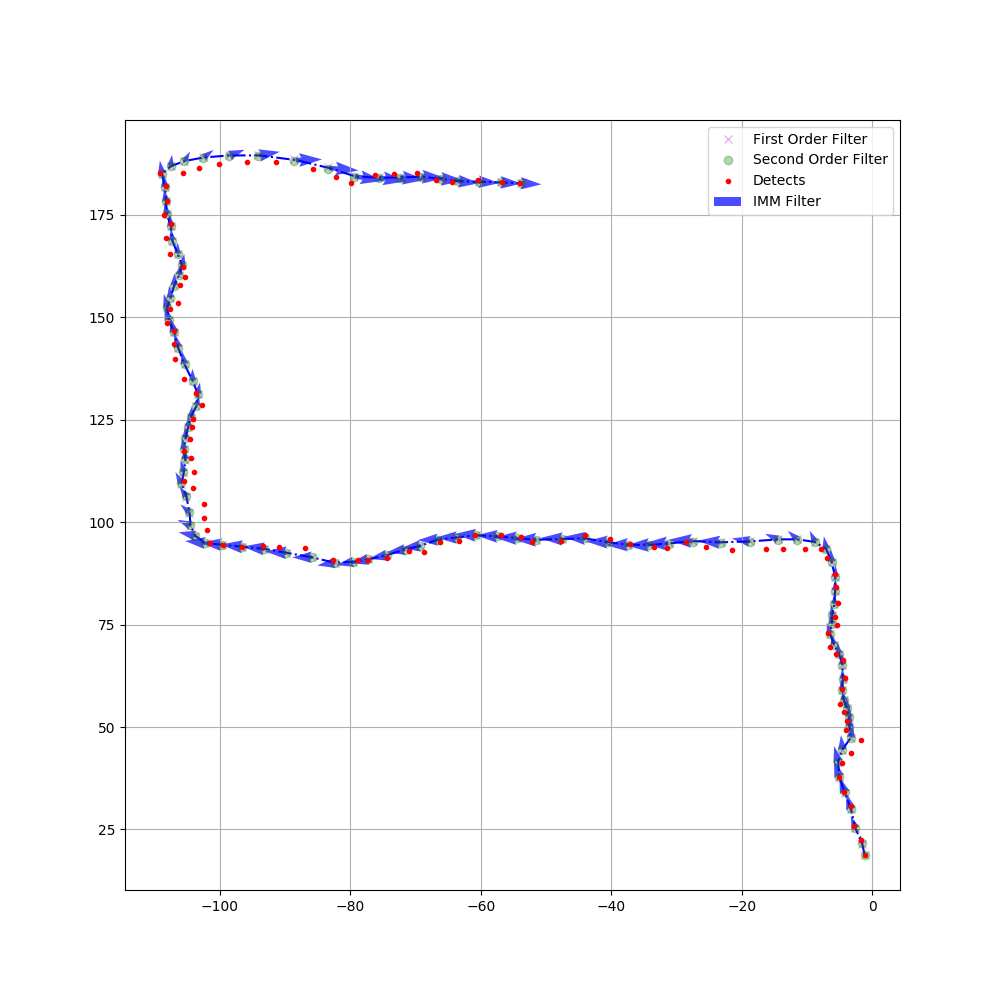

<IPython.core.display.Javascript object>


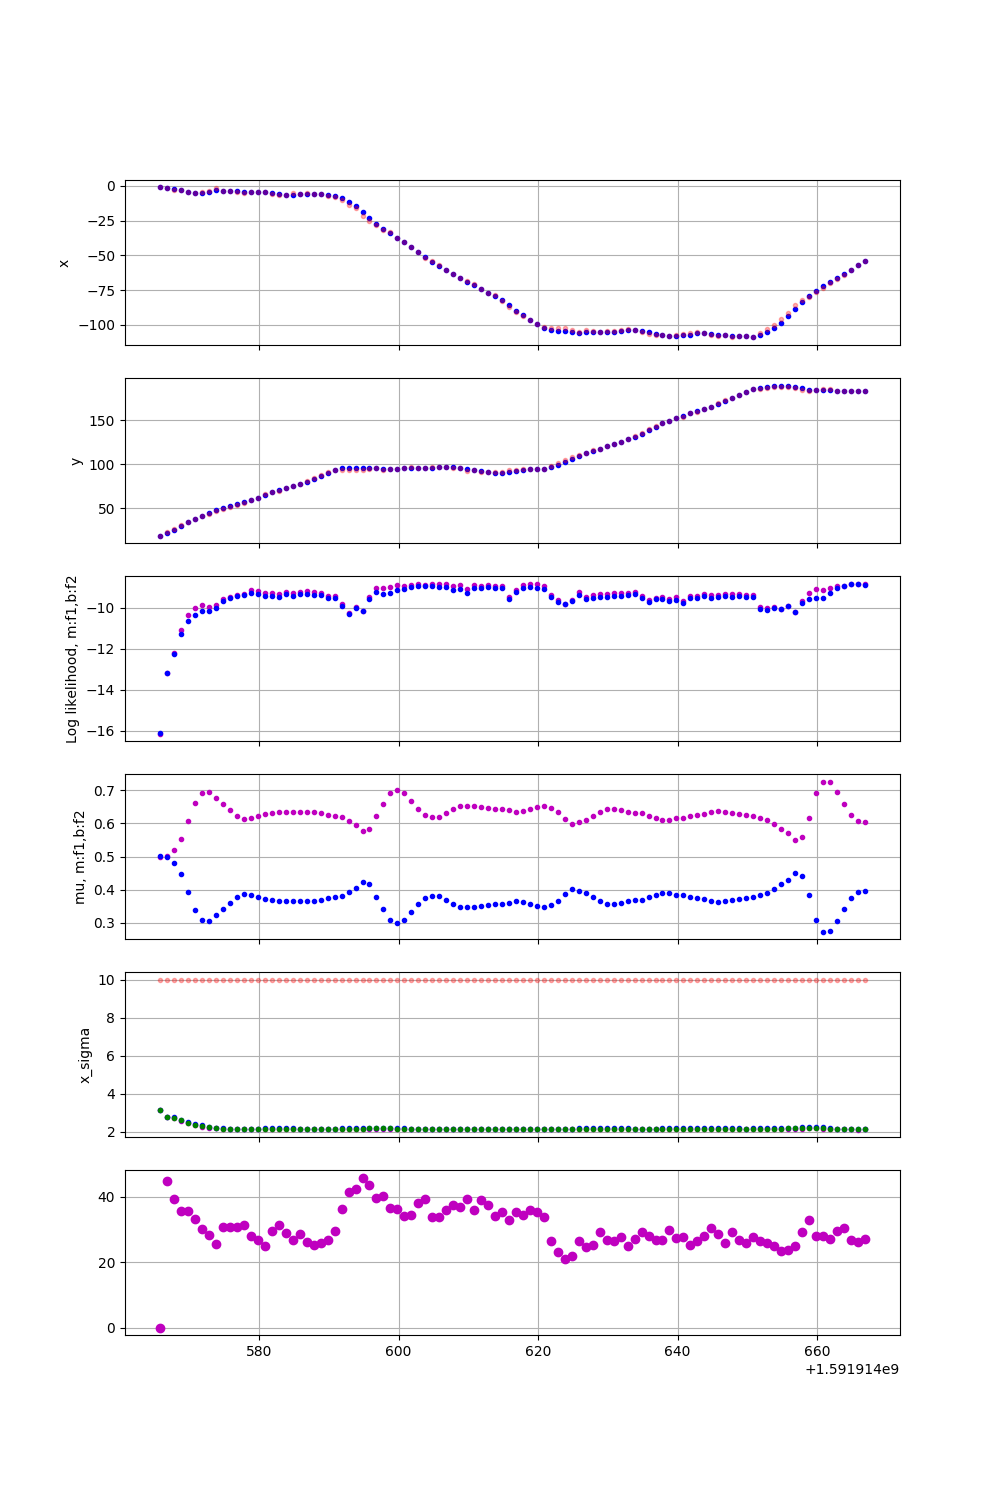

In [114]:
# Plotting
fig1 = plt.figure(figsize=(10,10))
for c in contacts:
    plt.plot(xc[c],yc[c],'-.b')
    plt.quiver(xc[c],yc[c],vxc[c],vyc[c],color='b',
               angles='xy', scale_units='xy', 
               alpha=0.7,scale=1,label='IMM Filter')
    plt.plot(xf1c[c],yf1c[c],'xm',alpha=0.3, label = "First Order Filter")
    plt.plot(xf1c[c],yf2c[c],'og',alpha=0.3, label = "Second Order Filter")

plt.plot(xd,yd,'.r',label="Detects")
plt.grid(True)
plt.legend()
plt.show()

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6,sharex=True,figsize=(10,15))
for c in contacts:
    #xcupper = xc[c] + np.sqrt(np.array(Pxc[c]))
    #xclower = xc[c] - np.sqrt(np.array(Pxc[c]))
    #ax1.errorbar(tc[c],xc[c],yerr = 1.96 * np.sqrt(Pxc[c]),
    #             marker='.',
    #             ls='',
    #             color='b')
    ax1.plot(tc[c],xc[c],'.b')
    ax2.plot(tc[c],yc[c],'.b')
    ax3.plot(tc[c],LLf1c[c],'.m')
    ax3.plot(tc[c],LLf2c[c],'.b')
    ax4.plot(tc[c],mu1c[c],'.m')
    ax4.plot(tc[c],mu2c[c],'.b')
    ax5.plot(tc[c],np.sqrt(np.array(Pxf1c[c])),'.m')
    ax5.plot(tc[c],np.sqrt(np.array(Pxf2c[c])),'.b')
    ax5.plot(tc[c],np.sqrt(np.array(Pxc[c])),'.g')
    ax6.plot(tc[c],BF[c],'om')

ax1.plot(td,xd,'.r',alpha=.3)
ax2.plot(td,yd,'.r',alpha=.3)
ax5.plot(td,Pxd,'.r', alpha=0.3)

ax1.set_ylabel('x')
ax2.set_ylabel('y')
ax3.set_ylabel('Log likelihood, m:f1,b:f2')
ax4.set_ylabel('mu, m:f1,b:f2')
ax5.set_ylabel('x_sigma')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)
ax5.grid(True)
ax6.grid(True)
plt.show()

In [108]:
contacts[1][1].filter_bank.filters

[KalmanFilter object
 dim_x = 6
 dim_z = 4
 dim_u = 0
 x = [ 1.45241319 10.92485033  0.68712974  1.76035817  0.          0.        ]
 P = [[ 7.83798243  0.          5.6687037   0.          0.          0.        ]
      [ 0.          7.83798243  0.          5.6687037   0.          0.        ]
      [ 5.6687037   0.         11.34922173  0.          0.          0.        ]
      [ 0.          5.6687037   0.         11.34922173  0.          0.        ]
      [ 0.          0.          0.          0.          0.          0.        ]
      [ 0.          0.          0.          0.          0.          0.        ]]
 x_prior = [0.50233517 8.49084475 0.         0.         0.         0.        ]
 P_prior = [[36.25309315  0.         26.21950804  0.          0.          0.        ]
            [ 0.         36.25309315  0.         26.21950804  0.          0.        ]
            [26.21950804  0.         26.21228396  0.          0.          0.        ]
            [ 0.         26.21950804  0.         

In [55]:
C = contact_tracker.contact.Contact(None,1)
C

NameError: name 'contact_tracker' is not defined

In [ ]:
C.set_F()
C.set_Q()

In [ ]:
N = 200
P = []
A = C.filter_bank.filters[1].F
Q = C.filter_bank.filters[1].Q
At = A.T
for i in range(N):
    # P.append(np.dot(np.linalg.matrix_power(At,i),np.dot(Q,np.linalg.matrix_power(A,i))))
    P.append(np.dot(np.linalg.matrix_power(A,i),np.dot(Q,np.linalg.matrix_power(A,i).T)))
    
Px = np.cumsum(np.array([x[0][0] for x in P]))
Py = np.cumsum(np.array([x[1][1] for x in P]))

plt.figure()
plt.plot(Px,'.')
plt.plot(Py,'.')
plt.show()

In [ ]:
Q

In [ ]:
np.linalg.info(A)